In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
#perform preprocessing

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}


[nltk_data] Downloading package stopwords to C:\Users\Shripad
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shripad
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shripad
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shripad Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
def parseXML(xmlFile):
  tree = ET.parse(xmlFile) 
  document_id = ""
  document_text = ""
  root = tree.getroot()
  for  elem in root:
    if elem.tag == "DOCNO":
      document_id = elem.text
    elif elem.tag == "TEXT":
      document_text = elem.text


  return document_id,document_text

In [5]:
    def removeTagsPunctuation(text):
        x = re.sub("[\.\?:,\\n/()!<$%\*\-+>\"\'\[\];]"," ",text)
        x = re.sub("[0-9]"," ",x)
        return x
    
    def decontracted(phrase):
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase
    
    def removeStopWordsAndLemmatize(text):

        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(text) 

        final_sentence = []

        #performing lemmatization using tags associated with the words
        lemmatizer = WordNetLemmatizer()
        tagged_sentence = nltk.pos_tag(word_tokens)
        final_sentence = [lemmatizer.lemmatize(word,tag_dict.get(tag[0].upper(),wordnet.NOUN)) for word,tag in tagged_sentence]   

        filtered_sentence = [w for w in final_sentence if not w in stop_words] 
        return " ".join(filtered_sentence)

In [6]:
import os
files = [ f for f in os.listdir("business") if f.endswith(".utf8") and f.find("index") == -1  ]

In [7]:
doc_ids = []
doc_texts = []

for fileName in files:
  doc_id,doc_text = parseXML("business/"+fileName)
  doc_ids.append(doc_id)
  doc_texts.append(doc_text)


In [8]:
data = pd.DataFrame(list(zip(doc_ids,doc_texts)),columns=['DOCNO','TEXT'])

In [9]:
data.head()

,DOCNO,TEXT
0,1040901_business_story_3700171.utf8,\n\n\nThe Telegraph - Calcutta : Business\n\n ...
1,1040901_business_story_3700827.utf8,\n\n\nThe Telegraph - Calcutta : Business\n\n ...
2,1040901_business_story_3701515.utf8,\n\n\nThe Telegraph - Calcutta : Business\n\n ...
3,1040901_business_story_3701518.utf8,\n\n\nThe Telegraph - Calcutta : Business\n\n ...
4,1040901_business_story_3701887.utf8,\n\n\nThe Telegraph - Calcutta : Business\n\n ...


In [10]:
data.shape

(1994, 2)

In [11]:
preprocessed_text_column = []
for i in range(data.shape[0]):
    text_column = data['TEXT'][i]
    text_column_decontracted = decontracted(text_column.lower())
    text_column_punctuation_removed = removeTagsPunctuation(text_column_decontracted)
    text_column_lemmatized = removeStopWordsAndLemmatize(text_column_punctuation_removed)
    preprocessed_text_column.append(text_column_lemmatized)



In [12]:
preprocessed_data = pd.DataFrame(list(zip(doc_ids,preprocessed_text_column)),columns=['DOCNO','TEXT'])

In [13]:
preprocessed_data.head()

,DOCNO,TEXT
0,1040901_business_story_3700171.utf8,telegraph calcutta business corporate brief ka...
1,1040901_business_story_3700827.utf8,telegraph calcutta business chamber happy nath...
2,1040901_business_story_3701515.utf8,telegraph calcutta business new centre cost pa...
3,1040901_business_story_3701518.utf8,telegraph calcutta business bharat petro krl m...
4,1040901_business_story_3701887.utf8,telegraph calcutta business mutual fund fund e...


In [14]:
data['TEXT'][10]

'\n\n\nThe Telegraph - Calcutta : Business\n\n Business Briefs\n\n New Delhi, Aug. 31: Fiscal deficit came down marginally by 4 per cent to Rs 50,398 crore in the first four months of 2004-05, soon after the government implemented the stringent Fiscal Responsibility and Budget Management Act. The deficit till July, which amounts to 36.7 per cent of the budgeted Rs 1,37,407 crore for the entire financial year, came down due to a surge in tax and non-tax receipts, according to figures released by the Controller General of Accounts today.\n\n Washington, Aug. 31: Chief executives of US companies that outsourced the greatest number of jobs reaped bigger pay and benefits last year, according to a new study of executive compensation released today. \n\n New Delhi, Aug. 31: Colgate Palmolive India has suspended operations of Colgate Palmolive (Nepal) due to non-availability of raw materials because of the recent truckers strike.\n\n New Delhi, Aug. 31: The government has assigned mini ratna s

In [15]:
preprocessed_data['TEXT'][10]

'telegraph calcutta business business brief new delhi aug fiscal deficit come marginally per cent rs crore first four month soon government implement stringent fiscal responsibility budget management act deficit till july amount per cent budget r crore entire financial year come due surge tax non tax receipt accord figure release controller general account today washington aug chief executive u company outsource great number job reap big pay benefit last year accord new study executive compensation release today new delhi aug colgate palmolive india suspend operation colgate palmolive nepal due non availability raw material recent trucker strike new delhi aug government assign mini ratna status housing urban development corp hudco sanction loan r crore r crore year ago new delhi aug centre today say strict action take vanish company protect interest small investor calcutta aug gkw await approval revise rehabilitation scheme board industrial financial reconstruction bifr future course a

In [16]:
corpus = preprocessed_data['TEXT'].values

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [77]:
idf_keyword = list(zip(tfidfVectorizer.get_feature_names(),tfidfVectorizer.idf_))

# sklearn keywords and idf values

In [78]:
idf_keyword

[('aa', 6.806639860095909),
 ('aaa', 6.806639860095909),
 ('aad', 7.905252148764019),
 ('aai', 6.652489180268651),
 ('aaifr', 7.905252148764019),
 ('aalayance', 7.905252148764019),
 ('aamir', 7.905252148764019),
 ('aarohi', 7.905252148764019),
 ('aaron', 7.905252148764019),
 ('aarvee', 7.905252148764019),
 ('aazmao', 7.905252148764019),
 ('ab', 6.401174751987744),
 ('aback', 7.905252148764019),
 ('abacus', 7.499787040655854),
 ('abandon', 6.518957787644128),
 ('abandoned', 7.905252148764019),
 ('abani', 7.905252148764019),
 ('abate', 7.905252148764019),
 ('abb', 6.652489180268651),
 ('abbot', 7.905252148764019),
 ('abbott', 7.499787040655854),
 ('abbreviate', 7.905252148764019),
 ('abbreviated', 7.212104968204073),
 ('abc', 7.499787040655854),
 ('abdomen', 7.905252148764019),
 ('abdul', 6.401174751987744),
 ('abdullah', 7.499787040655854),
 ('abel', 7.905252148764019),
 ('aberdeen', 7.499787040655854),
 ('aberration', 7.905252148764019),
 ('abeyance', 7.212104968204073),
 ('abhang', 7.

# Implementation of TF-IDF

In [67]:
import math
from scipy.sparse import csr_matrix

def customFit(dataset):
    wordsCountDict = dict()
    for row in dataset:
        listOfWords = row.split()
        wordsAdded = []
        for word in listOfWords:
            if wordsCountDict.get(word)==None:
                wordsCountDict[word] = 1
                wordsAdded.append(word)
            #Count the occurence of a word only once in a document
            elif wordsCountDict[word] != None and (wordsAdded.count(word) == 0):
                wordsAdded.append(word)
                wordsCountDict[word] = wordsCountDict[word]+1

    #Creating a list of word-idf pair
    idflist = list()
    for item in wordsCountDict:
        #Calculating idf as per the formula
        idf = math.log((len(dataset))/(wordsCountDict[item]))
        l = list()
        l.append(item)
        l.append(idf)
        idflist.append(l)
    idflist = sorted(idflist)
    return idflist

def customTransform(corpus,idfList):
    #Creating a sparse matrix to hold the vectors
    l=csr_matrix((len(corpus),len(idfList)))
    s = 0
    for sentence in corpus:
        listOfWords  = sentence.split()
        totalNoOfWords = len(listOfWords)
        k = 0
        for item in idfList:
            word = item[0]
            idfValue = item[1]
            count = listOfWords.count(word)
            #Calculating tf value for each word in the vocabulary
            tf = count/totalNoOfWords
            value = tf*idfValue
            l[s,k] = value
            k+=1
        s+=1
    return l  

In [60]:
idfList = customFit(corpus)

# custom implementation keywords and idf values

In [61]:
idfList

[['aa', 5.988460038087683],
 ['aaa', 5.988460038087683],
 ['aad', 7.597897950521784],
 ['aai', 5.806138481293728],
 ['aaifr', 7.597897950521784],
 ['aalayance', 7.597897950521784],
 ['aamir', 7.597897950521784],
 ['aarohi', 7.597897950521784],
 ['aaron', 7.597897950521784],
 ['aarvee', 7.597897950521784],
 ['aazmao', 7.597897950521784],
 ['ab', 5.518456408841947],
 ['aback', 7.597897950521784],
 ['abacus', 6.904750769961838],
 ['abandon', 5.65198780146647],
 ['abandoned', 7.597897950521784],
 ['abani', 7.597897950521784],
 ['abate', 7.597897950521784],
 ['abb', 5.806138481293728],
 ['abbot', 7.597897950521784],
 ['abbott', 6.904750769961838],
 ['abbreviate', 7.597897950521784],
 ['abbreviated', 6.499285661853674],
 ['abc', 6.904750769961838],
 ['abdomen', 7.597897950521784],
 ['abdul', 5.518456408841947],
 ['abdullah', 6.904750769961838],
 ['abel', 7.597897950521784],
 ['aberdeen', 6.904750769961838],
 ['aberration', 7.597897950521784],
 ['abeyance', 6.499285661853674],
 ['abhang', 7.5

# Comparing keywords and tf-idf values with sklearn. 
# For the first five documents, keyword - tfidf pair is shown in descending order of tfidf values

In [56]:
first_5_docs = preprocessed_data.head(5)['TEXT'].values

In [105]:
preprocessed_data.head(5)['DOCNO'].values

array(['1040901_business_story_3700171.utf8',
       '1040901_business_story_3700827.utf8',
       '1040901_business_story_3701515.utf8',
       '1040901_business_story_3701518.utf8',
       '1040901_business_story_3701887.utf8'], dtype=object)

In [68]:
first_5_docs_tfidf_vector = customTransform(first_5_docs,idfList)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


# DOC 1040901_business_story_3700171.utf8 keywords and tfidf values(Custom Implementation)

In [71]:
first_docs_tfidf_vector = first_5_docs_tfidf_vector.toarray()[0]
list_of_words = [ pair[0] for pair in idfList ]
doc_1_idf = list(zip(list(first_docs_tfidf_vector),list_of_words))
doc_1_idf.sort(reverse = True)
doc_1_idf

[(0.05178713674783804, 'kanoria'),
 (0.04949484931794337, 'hikal'),
 (0.0477168130524915, 'iso'),
 (0.04642620578267899, 'consolidation'),
 (0.04626405164377473, 'library'),
 (0.04558217111478314, 'content'),
 (0.044793828870259664, 'idbi'),
 (0.04112538826624477, 'solution'),
 (0.03986316422486615, 'award'),
 (0.03496098545091487, 'enterprise'),
 (0.030270509763034994, 'sei'),
 (0.030270509763034994, 'paltech'),
 (0.030270509763034994, 'mahad'),
 (0.030270509763034994, 'ges'),
 (0.030270509763034994, 'flexibonds'),
 (0.030270509763034994, 'ecm'),
 (0.030270509763034994, 'cropscience'),
 (0.030270509763034994, 'cmm'),
 (0.030270509763034994, 'chlor'),
 (0.030270509763034994, 'agrochemical'),
 (0.028186891951994936, 'chemical'),
 (0.02778505248086432, 'function'),
 (0.02750896721100334, 'sierra'),
 (0.02750896721100334, 'entrepolis'),
 (0.02750896721100334, 'alkali'),
 (0.02750896721100334, 'accredit'),
 (0.026455014594414673, 'plant'),
 (0.02589356837391902, 'omni'),
 (0.02589356837391

# DOC 1040901_business_story_3700171.utf8 keywords and tfidf values(sklearn) 

In [49]:
first_5_docs_tfidf_vector_sklearn = tfidfVectorizer.transform(first_5_docs)

In [50]:
first_5_docs_tfidf_vector_sklearn = first_5_docs_tfidf_vector_sklearn.toarray()
list_of_words = tfidfVectorizer.get_feature_names()
doc_1_idf_sk = list(zip(list(first_5_docs_tfidf_vector_sklearn[0]),list_of_words))
doc_1_idf_sk.sort(reverse = True)
doc_1_idf_sk

[(0.1832997460372775, 'consolidation'),
 (0.18131392989044057, 'kanoria'),
 (0.18069800173678371, 'content'),
 (0.1797284025925025, 'solution'),
 (0.1782642324804377, 'idbi'),
 (0.17570405116614857, 'hikal'),
 (0.1711204465026287, 'iso'),
 (0.16724506397866593, 'library'),
 (0.16297400739871987, 'award'),
 (0.1476837823170021, 'enterprise'),
 (0.12102481909330554, 'plant'),
 (0.11365547763806402, 'chemical'),
 (0.11240859945920084, 'function'),
 (0.1103477340083903, 'crore'),
 (0.10888025782589546, 'set'),
 (0.1056882464398574, 'singapore'),
 (0.0998928301695862, 'law'),
 (0.09936990242005421, 'sei'),
 (0.09936990242005421, 'paltech'),
 (0.09936990242005421, 'mahad'),
 (0.09936990242005421, 'ges'),
 (0.09936990242005421, 'flexibonds'),
 (0.09936990242005421, 'ecm'),
 (0.09936990242005421, 'cropscience'),
 (0.09936990242005421, 'cmm'),
 (0.09936990242005421, 'chlor'),
 (0.09936990242005421, 'agrochemical'),
 (0.09646849067733416, 'ltd'),
 (0.09601744764562341, 'quality'),
 (0.0942731607

# DOC 1040901_business_story_3700827.utf8 keywords and tfidf values(Custom Implementation)

In [72]:
second_docs_tfidf_vector = first_5_docs_tfidf_vector.toarray()[1]
list_of_words = [ pair[0] for pair in idfList ]
doc_2_idf = list(zip(list(second_docs_tfidf_vector),list_of_words))
doc_2_idf.sort(reverse = True)
doc_2_idf

[(0.0547583577666218, 'policy'),
 (0.04958688186230854, 'export'),
 (0.049085905947596, 'pragati'),
 (0.049085905947596, 'maidan'),
 (0.044455504358320415, 'trade'),
 (0.036008995026169596, 'eou'),
 (0.036008995026169596, 'ehtp'),
 (0.0334658260139262, 'entitlement'),
 (0.03272393729839734, 'eous'),
 (0.03085166880924385, 'competitiveness'),
 (0.02853823942226782, 'hardware'),
 (0.02751724398717407, 'convention'),
 (0.026153821842852833, 'jaitley'),
 (0.025595608403723057, 'mait'),
 (0.0254041273584609, 'foreign'),
 (0.024122312780550832, 'earn'),
 (0.023971504723237464, 'commerce'),
 (0.023501614317092537, 'exhibition'),
 (0.023430060246500396, 'scheme'),
 (0.023415873393253177, 'chamber'),
 (0.022581443632538237, 'welcome'),
 (0.02157997873364152, 'indias'),
 (0.019141870891587823, 'manufacture'),
 (0.018917337721725904, 'president'),
 (0.018183402060797257, 'hotel'),
 (0.018004497513084798, 'superb'),
 (0.018004497513084798, 'restaurants'),
 (0.018004497513084798, 'refreshing'),
 (0

# DOC 1040901_business_story_3700827.utf8 keywords and tfidf values(sklearn )

In [75]:
second_5_docs_tfidf_vector_sklearn = first_5_docs_tfidf_vector_sklearn[1]
list_of_words = tfidfVectorizer.get_feature_names()
doc_2_idf_sk = list(zip(list(second_5_docs_tfidf_vector_sklearn),list_of_words))
doc_2_idf_sk.sort(reverse = True)
doc_2_idf_sk

[(0.2762861574604765, 'policy'),
 (0.25050990422053276, 'export'),
 (0.2248703024580371, 'trade'),
 (0.18246334548547805, 'pragati'),
 (0.18246334548547805, 'maidan'),
 (0.1375559752749686, 'entitlement'),
 (0.13547771337199221, 'foreign'),
 (0.12900676798662916, 'competitiveness'),
 (0.12821864106722758, 'eou'),
 (0.12821864106722758, 'ehtp'),
 (0.12164223032365203, 'eous'),
 (0.12134111807452798, 'hardware'),
 (0.1206069041824517, 'scheme'),
 (0.11428938105678295, 'commerce'),
 (0.10789954657446858, 'convention'),
 (0.10653465370804518, 'earn'),
 (0.10415087494145871, 'chamber'),
 (0.10382337115736906, 'jaitley'),
 (0.10211448421922112, 'mait'),
 (0.09707641125323062, 'president'),
 (0.09633620743445112, 'global'),
 (0.09585849019415932, 'say'),
 (0.09553807347564557, 'exhibition'),
 (0.09258092273466165, 'welcome'),
 (0.09177538700976445, 'service'),
 (0.08967098107398408, 'manufacture'),
 (0.08932615952281454, 'indias'),
 (0.07819151682081929, 'target'),
 (0.07808371110010713, 'hot

# DOC 1040901_business_story_3701515.utf8 keywords and tfidf(custom implmentation)

In [85]:
third_docs_tfidf_vector = first_5_docs_tfidf_vector.toarray()[2]
list_of_words = [ pair[0] for pair in idfList ]
doc_3_idf = list(zip(list(third_docs_tfidf_vector),list_of_words))
doc_3_idf.sort(reverse = True)
doc_3_idf

[(0.1645181329144968, 'patni'),
 (0.08582202430235368, 'centre'),
 (0.08349338407166795, 'salai'),
 (0.08349338407166795, 'patnis'),
 (0.08349338407166795, 'anna'),
 (0.054976122090337386, 'professional'),
 (0.052359171499621625, 'vertical'),
 (0.051136911773135646, 'accommodate'),
 (0.047316101073782035, 'chennai'),
 (0.04174669203583398, 'siruseri'),
 (0.04174669203583398, 'kutar'),
 (0.037938191043746364, 'gandhinagar'),
 (0.037453222071377565, 'client'),
 (0.03474226160390366, 'service'),
 (0.03412969005165876, 'navi'),
 (0.03277777399648928, 'multiple'),
 (0.03105487803003555, 'continuously'),
 (0.03032118905957114, 'noida'),
 (0.03032118905957114, 'architect'),
 (0.029674029522997608, 'chosen'),
 (0.029033746076049704, 'achieve'),
 (0.02857144328419458, 'physical'),
 (0.028354321462782602, 'development'),
 (0.026991586747462902, 'insurance'),
 (0.02651268806748353, 'aug'),
 (0.02586552853091, 'plot'),
 (0.02559713137064459, 'financial'),
 (0.025568455886567823, 'sixth'),
 (0.0250

# DOC 1040901_business_story_3701515.utf8 keywords and tfidf(sklearn)

In [86]:
third_5_docs_tfidf_vector_sklearn = first_5_docs_tfidf_vector_sklearn[2]
list_of_words = tfidfVectorizer.get_feature_names()
doc_3_idf_sk = list(zip(list(third_5_docs_tfidf_vector_sklearn),list_of_words))
doc_3_idf_sk.sort(reverse = True)
doc_3_idf_sk

[(0.4580817255987888, 'patni'),
 (0.31759053231652273, 'centre'),
 (0.2128070014004431, 'salai'),
 (0.2128070014004431, 'patnis'),
 (0.2128070014004431, 'anna'),
 (0.17450963005945297, 'professional'),
 (0.15595392268517091, 'chennai'),
 (0.15365837907858793, 'vertical'),
 (0.15232141558631052, 'service'),
 (0.15082210580340188, 'accommodate'),
 (0.11827725825545439, 'client'),
 (0.10974621221951489, 'development'),
 (0.10696344231039125, 'multiple'),
 (0.10640350070022155, 'siruseri'),
 (0.10640350070022155, 'kutar'),
 (0.10300932116882386, 'financial'),
 (0.10094600154616257, 'gandhinagar'),
 (0.0978680349944404, 'achieve'),
 (0.09407036575451058, 'navi'),
 (0.09289731686747266, 'insurance'),
 (0.08869295390039887, 'mumbai'),
 (0.0877441878474119, 'continuously'),
 (0.08752379371573611, 'facility'),
 (0.08615884596569878, 'noida'),
 (0.08615884596569878, 'architect'),
 (0.08560018563455009, 'add'),
 (0.08474070932810576, 'chosen'),
 (0.08326445126014925, 'software'),
 (0.082286688693

# DOC 1040901_business_story_3701518.utf8 keywords and tfidf(Custom implementation)

In [87]:
fourth_docs_tfidf_vector = first_5_docs_tfidf_vector.toarray()[3]
list_of_words = [ pair[0] for pair in idfList ]
doc_4_idf = list(zip(list(fourth_docs_tfidf_vector),list_of_words))
doc_4_idf.sort(reverse = True)
doc_4_idf

[(0.11431487536554114, 'bharat'),
 (0.10498178064371556, 'petro'),
 (0.06701135974198007, 'kochi'),
 (0.06587113846473318, 'behuria'),
 (0.058357486894092085, 'refinery'),
 (0.047026075568603366, 'corporation'),
 (0.040993915662891185, 'merger'),
 (0.031627308811252475, 'margin'),
 (0.030766050762151085, 'refining'),
 (0.02608262386647578, 'sri'),
 (0.025668574157168188, 'petros'),
 (0.025668574157168188, 'bina'),
 (0.025668574157168188, 'behurias'),
 (0.025668574157168188, 'afloat'),
 (0.02528446220181874, 'oil'),
 (0.024374403036806488, 'petroleum'),
 (0.023326860709330537, 'sarthak'),
 (0.023326860709330537, 'krl'),
 (0.022255627414308202, 'merge'),
 (0.021802303164075748, 'deal'),
 (0.021629048771920678, 'earlier'),
 (0.021242206871520806, 'price'),
 (0.020985147261492882, 'decent'),
 (0.02023128391245839, 'relook'),
 (0.01964476103238024, 'chairman'),
 (0.019615332707073406, 'transact'),
 (0.019615332707073406, 'libya'),
 (0.019615332707073406, 'ceylon'),
 (0.019615332707073406, '

# DOC 1040901_business_story_3701518.utf8 tfidf and keywords(sklearn)

In [88]:
fourth_5_docs_tfidf_vector_sklearn = first_5_docs_tfidf_vector_sklearn[3]
list_of_words = tfidfVectorizer.get_feature_names()
doc_4_idf_sk = list(zip(list(fourth_5_docs_tfidf_vector_sklearn),list_of_words))
doc_4_idf_sk.sort(reverse = True)
doc_4_idf_sk

[(0.4333382177512498, 'bharat'),
 (0.37677299957995575, 'petro'),
 (0.2282912897391048, 'kochi'),
 (0.21507699873701394, 'refinery'),
 (0.21220243932525465, 'corporation'),
 (0.2096387721361814, 'behuria'),
 (0.15594542583494564, 'merger'),
 (0.11946105393889356, 'margin'),
 (0.11116621248426756, 'oil'),
 (0.10930773860107115, 'price'),
 (0.1067238610903262, 'refining'),
 (0.10618193287883486, 'plan'),
 (0.09882708949608866, 'petroleum'),
 (0.0950344753771478, 'chairman'),
 (0.09373726609122436, 'sri'),
 (0.09148630980446221, 'deal'),
 (0.09099152975100026, 'earlier'),
 (0.08318651873025462, 'point'),
 (0.08295728499592347, 'merge'),
 (0.0765956384532249, 'petros'),
 (0.0765956384532249, 'bina'),
 (0.0765956384532249, 'behurias'),
 (0.0765956384532249, 'afloat'),
 (0.07570404996617239, 'high'),
 (0.07384935842256589, 'west'),
 (0.07266700237159068, 'sarthak'),
 (0.07266700237159068, 'krl'),
 (0.07156690957835789, 'crude'),
 (0.06926851797920613, 'hit'),
 (0.06871708072838577, 'say'),
 

# DOC 1040901_business_story_3701887.utf8 keywords and tfidf(custom implementation)

In [90]:
fifth_docs_tfidf_vector = first_5_docs_tfidf_vector.toarray()[4]
list_of_words = [ pair[0] for pair in idfList ]
doc_5_idf = list(zip(list(fifth_docs_tfidf_vector),list_of_words))
doc_5_idf.sort(reverse = True)
doc_5_idf

[(0.13186461478858505, 'uti'),
 (0.094614801866821, 'mip'),
 (0.06411007552579413, 'hdfc'),
 (0.057867008019098894, 'plus'),
 (0.05229795031852916, 'icici'),
 (0.0495204231157993, 'equity'),
 (0.04866395313930452, 'liquid'),
 (0.04725642486032651, 'income'),
 (0.04577543710524915, 'templeton'),
 (0.04527326638383601, 'birla'),
 (0.04210112483395012, 'magnum'),
 (0.039300788255487266, 'prudential'),
 (0.03868349664119798, 'kotak'),
 (0.03828418233152264, 'dspml'),
 (0.03688200333561331, 'gilt'),
 (0.0346768953518202, 'tata'),
 (0.03438533034773154, 'principal'),
 (0.032817903665736566, 'balance'),
 (0.031818783002622704, 'sundaram'),
 (0.02970536513814273, 'cash'),
 (0.026631941372147538, 'hsbc'),
 (0.025894897522554586, 'alliance'),
 (0.025708325370819896, 'bond'),
 (0.025550888411850783, 'regular'),
 (0.025497136356678673, 'term'),
 (0.02528556203628783, 'float'),
 (0.022887718552624576, 'franklin'),
 (0.021724214076770262, 'g'),
 (0.01940078395642148, 'select'),
 (0.01914209116576132

# DOC 1040901_business_story_3701887.utf8 tfidf and keywords(sklearn)

In [92]:
fifth_5_docs_tfidf_vector_sklearn = first_5_docs_tfidf_vector_sklearn[4]
list_of_words = tfidfVectorizer.get_feature_names()
doc_5_idf_sk = list(zip(list(fifth_5_docs_tfidf_vector_sklearn),list_of_words))
doc_5_idf_sk.sort(reverse = True)
doc_5_idf_sk

[(0.4698557143411369, 'uti'),
 (0.3226291849637532, 'mip'),
 (0.22826254158087314, 'hdfc'),
 (0.2043001531537948, 'plus'),
 (0.20217598356941233, 'equity'),
 (0.18991620647064175, 'icici'),
 (0.18465578626630774, 'income'),
 (0.16876394102401351, 'liquid'),
 (0.16393937653726842, 'birla'),
 (0.15737489033219362, 'templeton'),
 (0.1439606816752028, 'magnum'),
 (0.13675233063904466, 'prudential'),
 (0.13650797690371383, 'tata'),
 (0.13516135577679625, 'kotak'),
 (0.1301778197366255, 'dspml'),
 (0.1265731038935946, 'gilt'),
 (0.12014342735715222, 'principal'),
 (0.1200147883362965, 'balance'),
 (0.11196051617838991, 'cash'),
 (0.10958591433699562, 'sundaram'),
 (0.10881864257725389, 'term'),
 (0.09725222949478232, 'india'),
 (0.09430122510297764, 'alliance'),
 (0.09381881065233905, 'bond'),
 (0.09272549650147938, 'float'),
 (0.0922796380640892, 'hsbc'),
 (0.08949367936239476, 'regular'),
 (0.08457247412710338, 'growth'),
 (0.07868744516609681, 'franklin'),
 (0.07155250526753638, 'opportun

# Keywords obtained from our implementation and sklearn are the same, while the tf-idf values obtained are different since sklearn uses slightly different formula to calculate the tf-idf values and also performs L2 normalization.

# TF-IDF VARIANT: LOGARITHM

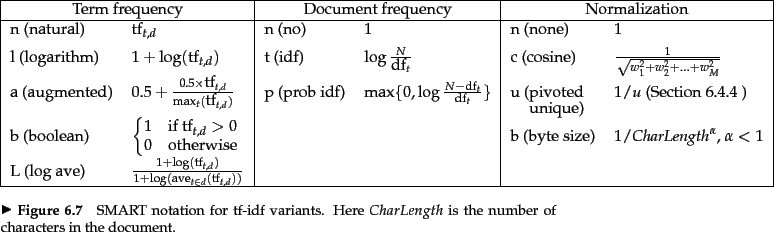



In [98]:
import math
from scipy.sparse import csr_matrix

def customFitLog(dataset):
    wordsCountDict = dict()
    for row in dataset:
        listOfWords = row.split()
        wordsAdded = []
        for word in listOfWords:
            if wordsCountDict.get(word)==None:
                wordsCountDict[word] = 1
                wordsAdded.append(word)
            #Count the occurence of a word only once in a document
            elif wordsCountDict[word] != None and (wordsAdded.count(word) == 0):
                wordsAdded.append(word)
                wordsCountDict[word] = wordsCountDict[word]+1

    #Creating a list of word-idf pair
    idflist = list()
    for item in wordsCountDict:
        #Calculating idf as per the formula
        idf = math.log((len(dataset))/(wordsCountDict[item]))
        l = list()
        l.append(item)
        l.append(idf)
        idflist.append(l)
    idflist = sorted(idflist)
    return idflist

def customTransformLog(corpus,idfList):
    #Creating a sparse matrix to hold the vectors
    l=csr_matrix((len(corpus),len(idfList)))
    s = 0
    for sentence in corpus:
        listOfWords  = sentence.split()
        totalNoOfWords = len(listOfWords)
        #Magnitude of each vector required to perform normalization
        magnitude = 0
        k = 0
        for item in idfList:
            word = item[0]
            idfValue = item[1]
            count = listOfWords.count(word)
            #Formula used for tf calculation as per the table shown above
            tf = 0
            if count > 0:
                tf = 1+ math.log(count/totalNoOfWords) 
            value = tf*idfValue
            l[s,k] = value
            magnitude+=value**2
            k+=1
        magnitude = math.sqrt(magnitude)
        #Performing normalization of the vector as per the formula in above table 
        for i in range(len(idfList)):
            if magnitude > 0:
                 l[s,i] = l[s,i]/magnitude
        s+=1
    return l 

In [96]:
idfListNew = customFitLog(corpus)

In [99]:
first_5_docs_tfidf_vector_log = customTransformLog(first_5_docs,idfListNew)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


# DOC 1 Keywords and Tf-IDF Values

In [101]:
first_docs_tfidf_vector_log = first_5_docs_tfidf_vector_log.toarray()[0]
list_of_words = [ pair[0] for pair in idfListNew ]
doc_1_idf_log = list(zip(list(first_docs_tfidf_vector_log),list_of_words))
doc_1_idf_log.sort()
doc_1_idf_log

[(-0.15062305908704018, 'agrochemical'),
 (-0.15062305908704018, 'chlor'),
 (-0.15062305908704018, 'cmm'),
 (-0.15062305908704018, 'cropscience'),
 (-0.15062305908704018, 'ecm'),
 (-0.15062305908704018, 'flexibonds'),
 (-0.15062305908704018, 'ges'),
 (-0.15062305908704018, 'mahad'),
 (-0.15062305908704018, 'paltech'),
 (-0.15062305908704018, 'sei'),
 (-0.1368818968059219, 'accredit'),
 (-0.1368818968059219, 'alkali'),
 (-0.1368818968059219, 'entrepolis'),
 (-0.1368818968059219, 'sierra'),
 (-0.1288438321551437, 'hummingbird'),
 (-0.1288438321551437, 'omni'),
 (-0.11871706833010509, 'integrity'),
 (-0.11510266987402541, 'atlantic'),
 (-0.11510266987402541, 'compliant'),
 (-0.11204673952235045, 'bayer'),
 (-0.1093995722436853, 'canon'),
 (-0.1093995722436853, 'laser'),
 (-0.1093995722436853, 'minimise'),
 (-0.1093995722436853, 'offshoring'),
 (-0.10910929062038842, 'kanoria'),
 (-0.10706460522324723, 'intermediate'),
 (-0.10706460522324723, 'slr'),
 (-0.10497590604898681, 'outlay'),
 (-0

# Same keywords are obtained for the TF-IDF(LOGARITHM) implementation above but the values obtained and the importance of the keywords is different